<a href="https://colab.research.google.com/github/ef1s/A1-SY/blob/main/Econ441b-A4-SY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]].copy()
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]
x = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0,7
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0,9
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0,15
555717,2020-12-31 23:59:24,travel,7.99,129,0,24


# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=0)
ros.fit(x,y)
x_ros, y_ros = ros.fit_resample(x,y)

In [ ]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x,y)
x_rus, y_rus = rus.fit_resample(x,y)

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE()
x_os, y_os = os.fit_resample(x,y)

# 3.) Train three logistic regression models 

In [ ]:
#over x, y
#under x, y
#smote x, y

In [ ]:
from sklearn.linear_model import LogisticRegression
ros_train = LogisticRegression().fit(x_ros,y_ros)

In [ ]:
rus_train = LogisticRegression().fit(x_rus,y_rus)

In [ ]:
smote_train = LogisticRegression().fit(x_os,y_os)

# 4.) Test the three models

In [ ]:
ros_p = ros_train.predict(X_test)

In [ ]:
rus_p = rus_train.predict(X_test)

In [ ]:
smote_p = smote_train.predict(X_test)

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
from sklearn import metrics

ros_cm = metrics.confusion_matrix(y_test, ros_p)

print(ros_cm)
TPR = ros_cm[0,0]/(ros_cm[0,0]+ros_cm[0,1])
TNR = ros_cm[1,1]/(ros_cm[1,1]+ros_cm[1,0])
ros_score = metrics.accuracy_score(y_test,ros_p)
print('''TPR is:{} and TNR is:{}.\nAccuracy is:{}'''.format(TPR,TNR,ros_score))

[[135151  30917]
 [   155    493]]
TPR is:0.8138292747549196 and TNR is:0.7608024691358025.
Accuracy is:0.8136231675424075


In [ ]:
rus_cm = metrics.confusion_matrix(y_test, rus_p)
print(rus_cm)
TPR = rus_cm[0,0]/(rus_cm[0,0]+rus_cm[0,1])
TNR = rus_cm[1,1]/(rus_cm[1,1]+rus_cm[1,0])
rus_score = metrics.accuracy_score(y_test,rus_p)
print('TPR is:{} and TNR is:{}.\nAccuracy is:{}:'.format(TPR,TNR,rus_score))


[[135559  30509]
 [   155    493]]
TPR is:0.8162860996700146 and TNR is:0.7608024691358025.
Accuracy is:0.8160704431488279:


In [ ]:
smote_cm = metrics.confusion_matrix(y_test, smote_p)
print(smote_cm)
TPR = smote_cm[0,0]/(smote_cm[0,0]+smote_cm[0,1])
TNR = smote_cm[1,1]/(smote_cm[1,1]+smote_cm[1,0])
smote_score = metrics.accuracy_score(y_test,smote_p)
print('TPR is:{} and TNR is:{}.\nAccuracy is:{}:'.format(TPR,TNR,smote_score))

[[136217  29851]
 [   156    492]]
TPR is:0.8202483320085748 and TNR is:0.7592592592592593.
Accuracy is:0.820011276662108:


In [ ]:
print('SMOTE performs the best.')

SMOTE performs the best.


# 6.) Pick two features and plot the two classes before and after SMOTE.

Text(0.5, 1.0, 'Before SMOTE')

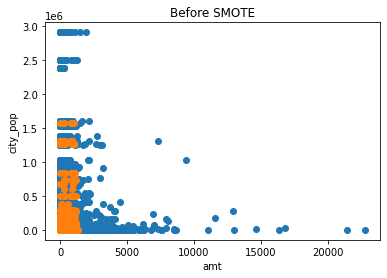

In [ ]:
import matplotlib.pyplot as plt
OG = pd.concat([X_train,y_train],axis=1)
plt.scatter(OG[OG['is_fraud']==0]['amt'],OG[OG['is_fraud']==0]['city_pop'])
plt.scatter(OG[OG['is_fraud']==1]['amt'],OG[OG['is_fraud']==1]['city_pop'])
plt.xlabel('amt')
plt.ylabel('city_pop')
plt.title('Before SMOTE')

Text(0.5, 1.0, 'After SMOTE')

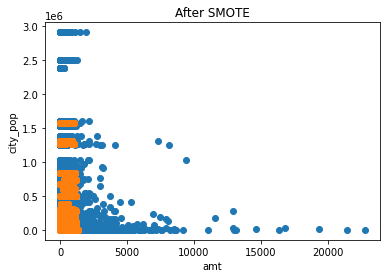

In [ ]:
NG = pd.concat([x_os,y_os],axis=1)
plt.scatter(NG[NG['is_fraud']==0]['amt'],NG[NG['is_fraud']==0]['city_pop'])
plt.scatter(NG[NG['is_fraud']==1]['amt'],NG[NG['is_fraud']==1]['city_pop'])
plt.xlabel('amt')
plt.ylabel('city_pop')
plt.title('After SMOTE')